In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import apyori
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [4]:
# Importar dados do CSV
df_padaria = pd.read_csv("cesta_padaria.csv")
df_padaria.head()

C:\Users\gusta\AppData\Local\Temp\ipykernel_2256\3334274285.py:2: DtypeWarning: Columns (0,5,8,9,10,12,16,18,20,27,31,33,34,36,38,39,41,42,44,46,52,53,54,56,59,63,64,66,67,68,69,70,71,76,80,81,82,84,89,90,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_padaria = pd.read_csv("cesta_padaria.csv")


,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Tamanho da base de dados: ", df_padaria.shape)

Tamanho da base de dados:  (9465, 94)


In [7]:
# Análise exploratória inicial
itens = df_padaria.melt()['value'].dropna().sort_values()
print(f'Existem {itens.nunique()} produtos distintos na base de dados:\n', itens.unique())

Existem 94 produtos distintos na base de dados:
 ['adjustment' 'afternoon with the baker' 'alfajores' 'argentina night'
 'art tray' 'bacon' 'baguette' 'bakewell' 'bare popcorn' 'basket'
 'bowl nic pitt' 'bread' 'bread pudding' 'brioche and salami' 'brownie'
 'cake' 'caramel bites' 'cherry me dried fruit' 'chicken sand'
 'chicken stew' 'chimichurri oil' 'chocolates' 'christmas common' 'coffee'
 'coffee granules' 'coke' 'cookies' 'crepes' 'crisps'
 'drinking chocolate spoons' 'duck egg' 'dulce de leche' 'eggs'
 "ella's kitchen pouches" 'empanadas' 'extra salami or feta' 'fairy doors'
 'farm house' 'focaccia' 'frittata' 'fudge' 'gift voucher'
 'gingerbread syrup' 'granola' 'hack the stack' 'half slice monster'
 'hearty & seasonal' 'honey' 'hot chocolate' 'jam' 'jammie dodgers'
 'juice' 'keeping it local' 'kids biscuit' 'lemon and coconut' 'medialuna'
 'mighty protein' 'mineral water' 'mortimer' 'muesli' 'muffin'
 'my-5 fruit shoot' 'nomad bag' 'olum & polenta' 'panatone' 'pastry'
 'pick a

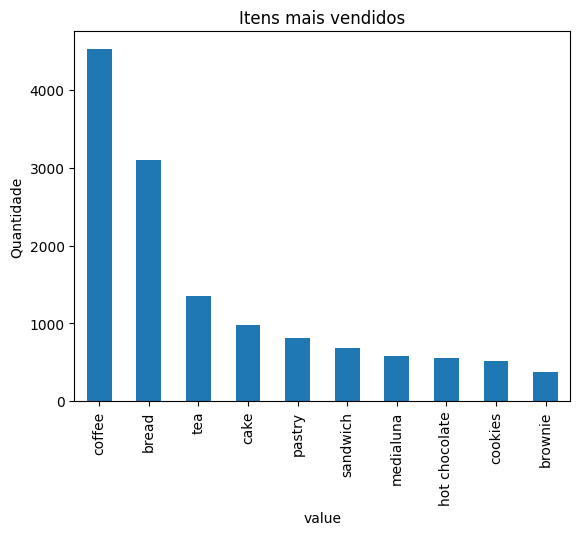

In [9]:
# Descobrir itens mais vendidos
qtde_itens = itens.value_counts()

ax = qtde_itens.nlargest(10).plot(kind='bar')
ax.set_title('Itens mais vendidos')
ax.set_ylabel('Quantidade')
plt.show()

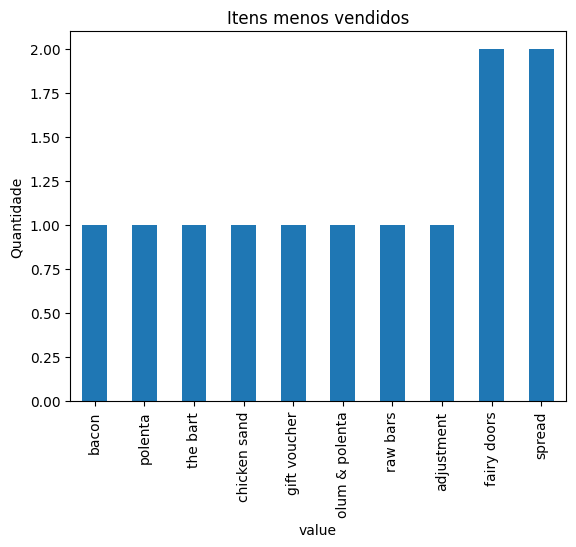

In [10]:
# Descobrir itens menos vendidos
ax = qtde_itens.nsmallest(10).plot(kind='bar')
ax.set_title('Itens menos vendidos')
ax.set_ylabel('Quantidade')
plt.show()

In [12]:
# Contar a quantidade de itens por compra (transação)
qtde_por_cesta = df_padaria.notna().apply(sum, axis=1)
qtde_por_cesta

0       1
1       1
2       3
3       1
4       3
       ..
9460    1
9461    4
9462    4
9463    2
9464    1
Length: 9465, dtype: int64

In [14]:
# No Apriori, é necessário haver ao menos 2 itens por transação, então é preciso eliminar as cestas com apenas 1 item
cestas = [set(linha.dropna()) for _, linha in df_padaria[qtde_por_cesta > 1].iterrows()]
cestas

[{'cookies', 'hot chocolate', 'jam'},
 {'bread', 'coffee', 'pastry'},
 {'medialuna', 'muffin', 'pastry'},
 {'coffee', 'medialuna', 'pastry', 'tea'},
 {'bread', 'pastry'},
 {'bread', 'muffin'},
 {'medialuna', 'scandinavian'},
 {'bread', 'medialuna'},
 {'coffee', 'jam', 'pastry', 'tartine', 'tea'},
 {'basket', 'bread', 'coffee'},
 {'bread', 'medialuna', 'pastry'},
 {'mineral water', 'scandinavian'},
 {'bread', 'coffee', 'medialuna'},
 {'bread', 'farm house'},
 {'bread', 'medialuna'},
 {'bread', 'coffee', 'medialuna'},
 {'muffin', 'scandinavian'},
 {'bread', 'coffee'},
 {'bread', 'jam'},
 {'muffin', 'scandinavian'},
 {'coffee', 'muffin'},
 {'muffin', 'scandinavian'},
 {'bread', 'tea'},
 {'bread', 'coffee'},
 {'bread', 'tea'},
 {'coffee', 'juice', 'muffin', 'tartine'},
 {'bread', 'tea'},
 {'fudge', 'scandinavian'},
 {'coffee', 'medialuna'},
 {'coffee', 'hot chocolate', 'medialuna'},
 {'bread', "ella's kitchen pouches", 'jam', 'juice', 'muffin'},
 {'coffee', 'medialuna'},
 {'bread', 'victor

In [15]:
print(f'Existem {len(cestas)} cestas de compras com 2 ou mais itens')

Existem 5517 cestas de compras com 2 ou mais itens


In [21]:
# Iniciar o algoritmo Apriori
minsup = 0.04
minconf = 0.4
regras_associacao = apyori.apriori(cestas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
    itens = list(regra.items)
    print(
      f"{itens[:-1]} --> [{itens[-1]}]  Suporte: {regra.support:.3f}"
      f"  Confiança: {regra.ordered_statistics[0].confidence:.3f}"
      )

[] --> [coffee]  Suporte: 0.604  Confiança: 0.604
['bread'] --> [coffee]  Suporte: 0.154  Confiança: 0.447
['coffee'] --> [cake]  Suporte: 0.094  Confiança: 0.586
['coffee'] --> [cookies]  Suporte: 0.048  Confiança: 0.568
['hot chocolate'] --> [coffee]  Suporte: 0.051  Confiança: 0.580
['medialuna'] --> [coffee]  Suporte: 0.060  Confiança: 0.631
['coffee'] --> [pastry]  Suporte: 0.082  Confiança: 0.600
['sandwich'] --> [coffee]  Suporte: 0.066  Confiança: 0.591
['tea'] --> [coffee]  Suporte: 0.086  Confiança: 0.412
['coffee'] --> [toast]  Suporte: 0.041  Confiança: 0.737
